In [5]:
!pip install lime
!pip install shap

                                              0.0/456.1 kB ? eta -:--:--
     ---------                              112.6/456.1 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 456.1/456.1 kB 4.7 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [13]:
X=pd.read_csv('train_data.csv')
y=pd.read_csv('test_data.csv')
X.shape


(792, 17)

In [11]:
y.head()

Unnamed: 0  PassengerId  Survived  Sex     Age      Fare  Pclass_1  \
0         791          792         0    1  0.2000  0.050749         0   
1         792          793         0    0  0.3500  0.135753         0   
2         793          794         0    1  0.3500  0.059914         1   
3         794          795         0    1  0.3125  0.015412         0   
4         795          796         0    1  0.4875  0.025374         0   

   Pclass_2  Pclass_3  Family_size  Title_1  Title_2  Title_3  Title_4  Emb_1  \
0         1         0          0.0        1        0        0        0      0   
1         0         1          1.0        0        0        0        1      0   
2         0         0          0.0        1        0        0        0      1   
3         0         1          0.0        1        0        0        0      0   
4         1         0          0.0        1        0        0        0      0   

   Emb_2  Emb_3  
0      0      1  
1      0      1  
2      0      0  
3      0      1  
4      0      1

In [14]:
df = pd.concat([X, y], ignore_index=True)
df.to_csv('titanic.csv', index=False)

In [15]:
df.head()

Unnamed: 0  PassengerId  Survived  Sex     Age      Fare  Pclass_1  \
0           0            1         0    1  0.2750  0.014151         0   
1           1            2         1    0  0.4750  0.139136         1   
2           2            3         1    0  0.3250  0.015469         0   
3           3            4         1    0  0.4375  0.103644         1   
4           4            5         0    1  0.4375  0.015713         0   

   Pclass_2  Pclass_3  Family_size  Title_1  Title_2  Title_3  Title_4  Emb_1  \
0         0         1          0.1        1        0        0        0      0   
1         0         0          0.1        1        0        0        0      1   
2         0         1          0.0        0        0        0        1      0   
3         0         0          0.1        1        0        0        0      0   
4         0         1          0.0        1        0        0        0      0   

   Emb_2  Emb_3  
0      0      1  
1      0      0  
2      0      1  
3      0      1  
4      0      1

In [16]:
df.shape

(892, 17)

In [18]:
df.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

In [19]:
nc=df.select_dtypes(include=[np.number]).columns
df[nc]=df[nc].fillna(df[nc].mean())

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [26]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [27]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# LIME explainer (use unscaled data)
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Use original values instead of scaled
    feature_names=X.columns.tolist(),
    class_names=['Survived', 'Not Survived'],
    mode='classification',
    feature_selection='auto'
)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


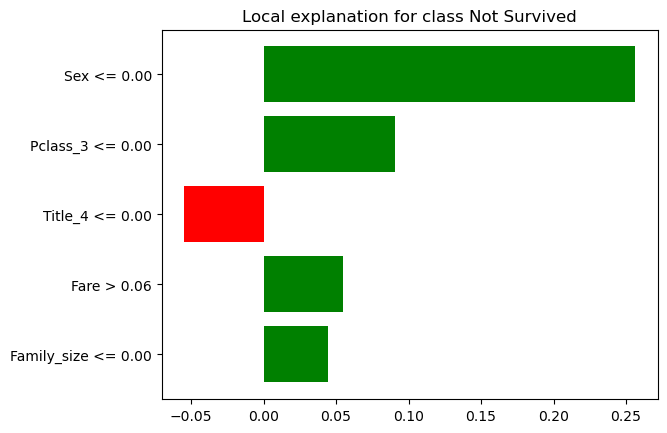

In [31]:
instance = X_test.iloc[0].values  # Use .iloc to extract raw values

# Generate explanation
exp = explainer.explain_instance(instance, clf.predict_proba, num_features=5)

# Show explanation
exp.show_in_notebook()

# Visualization of feature importance
fig = exp.as_pyplot_figure()
plt.show()

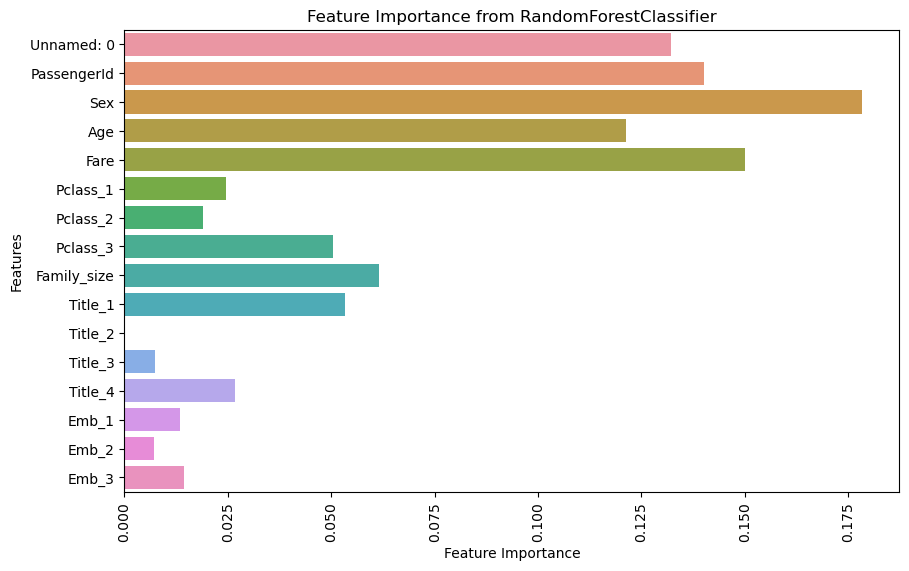

In [33]:
import seaborn as sns
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from RandomForestClassifier")
plt.xticks(rotation=90)
plt.show()

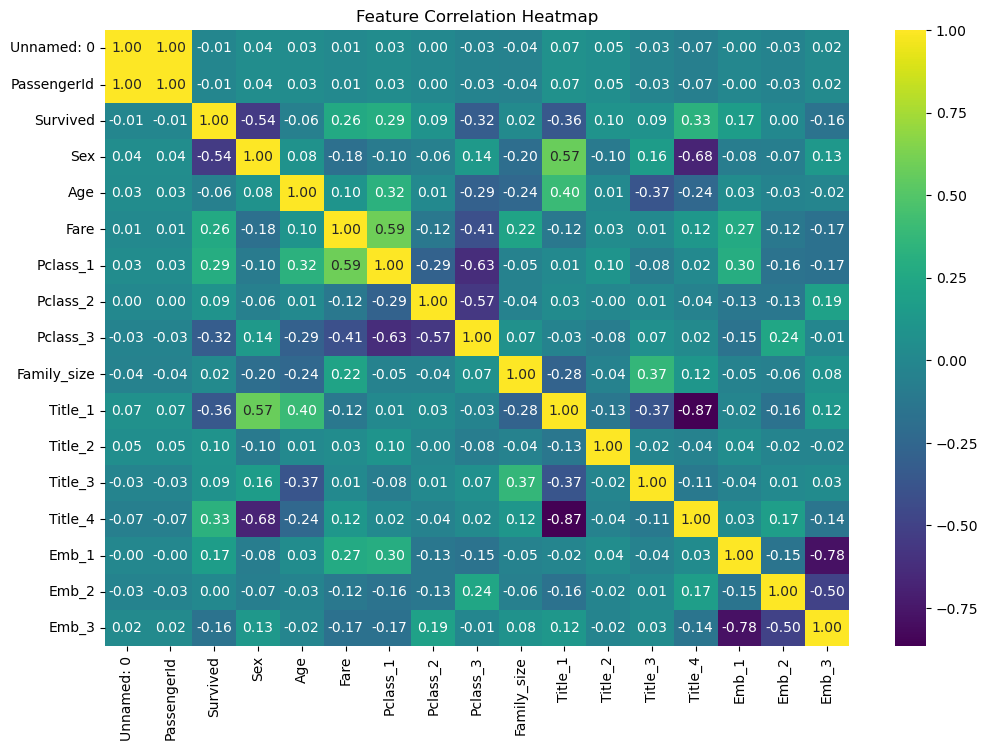

In [38]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="viridis", fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

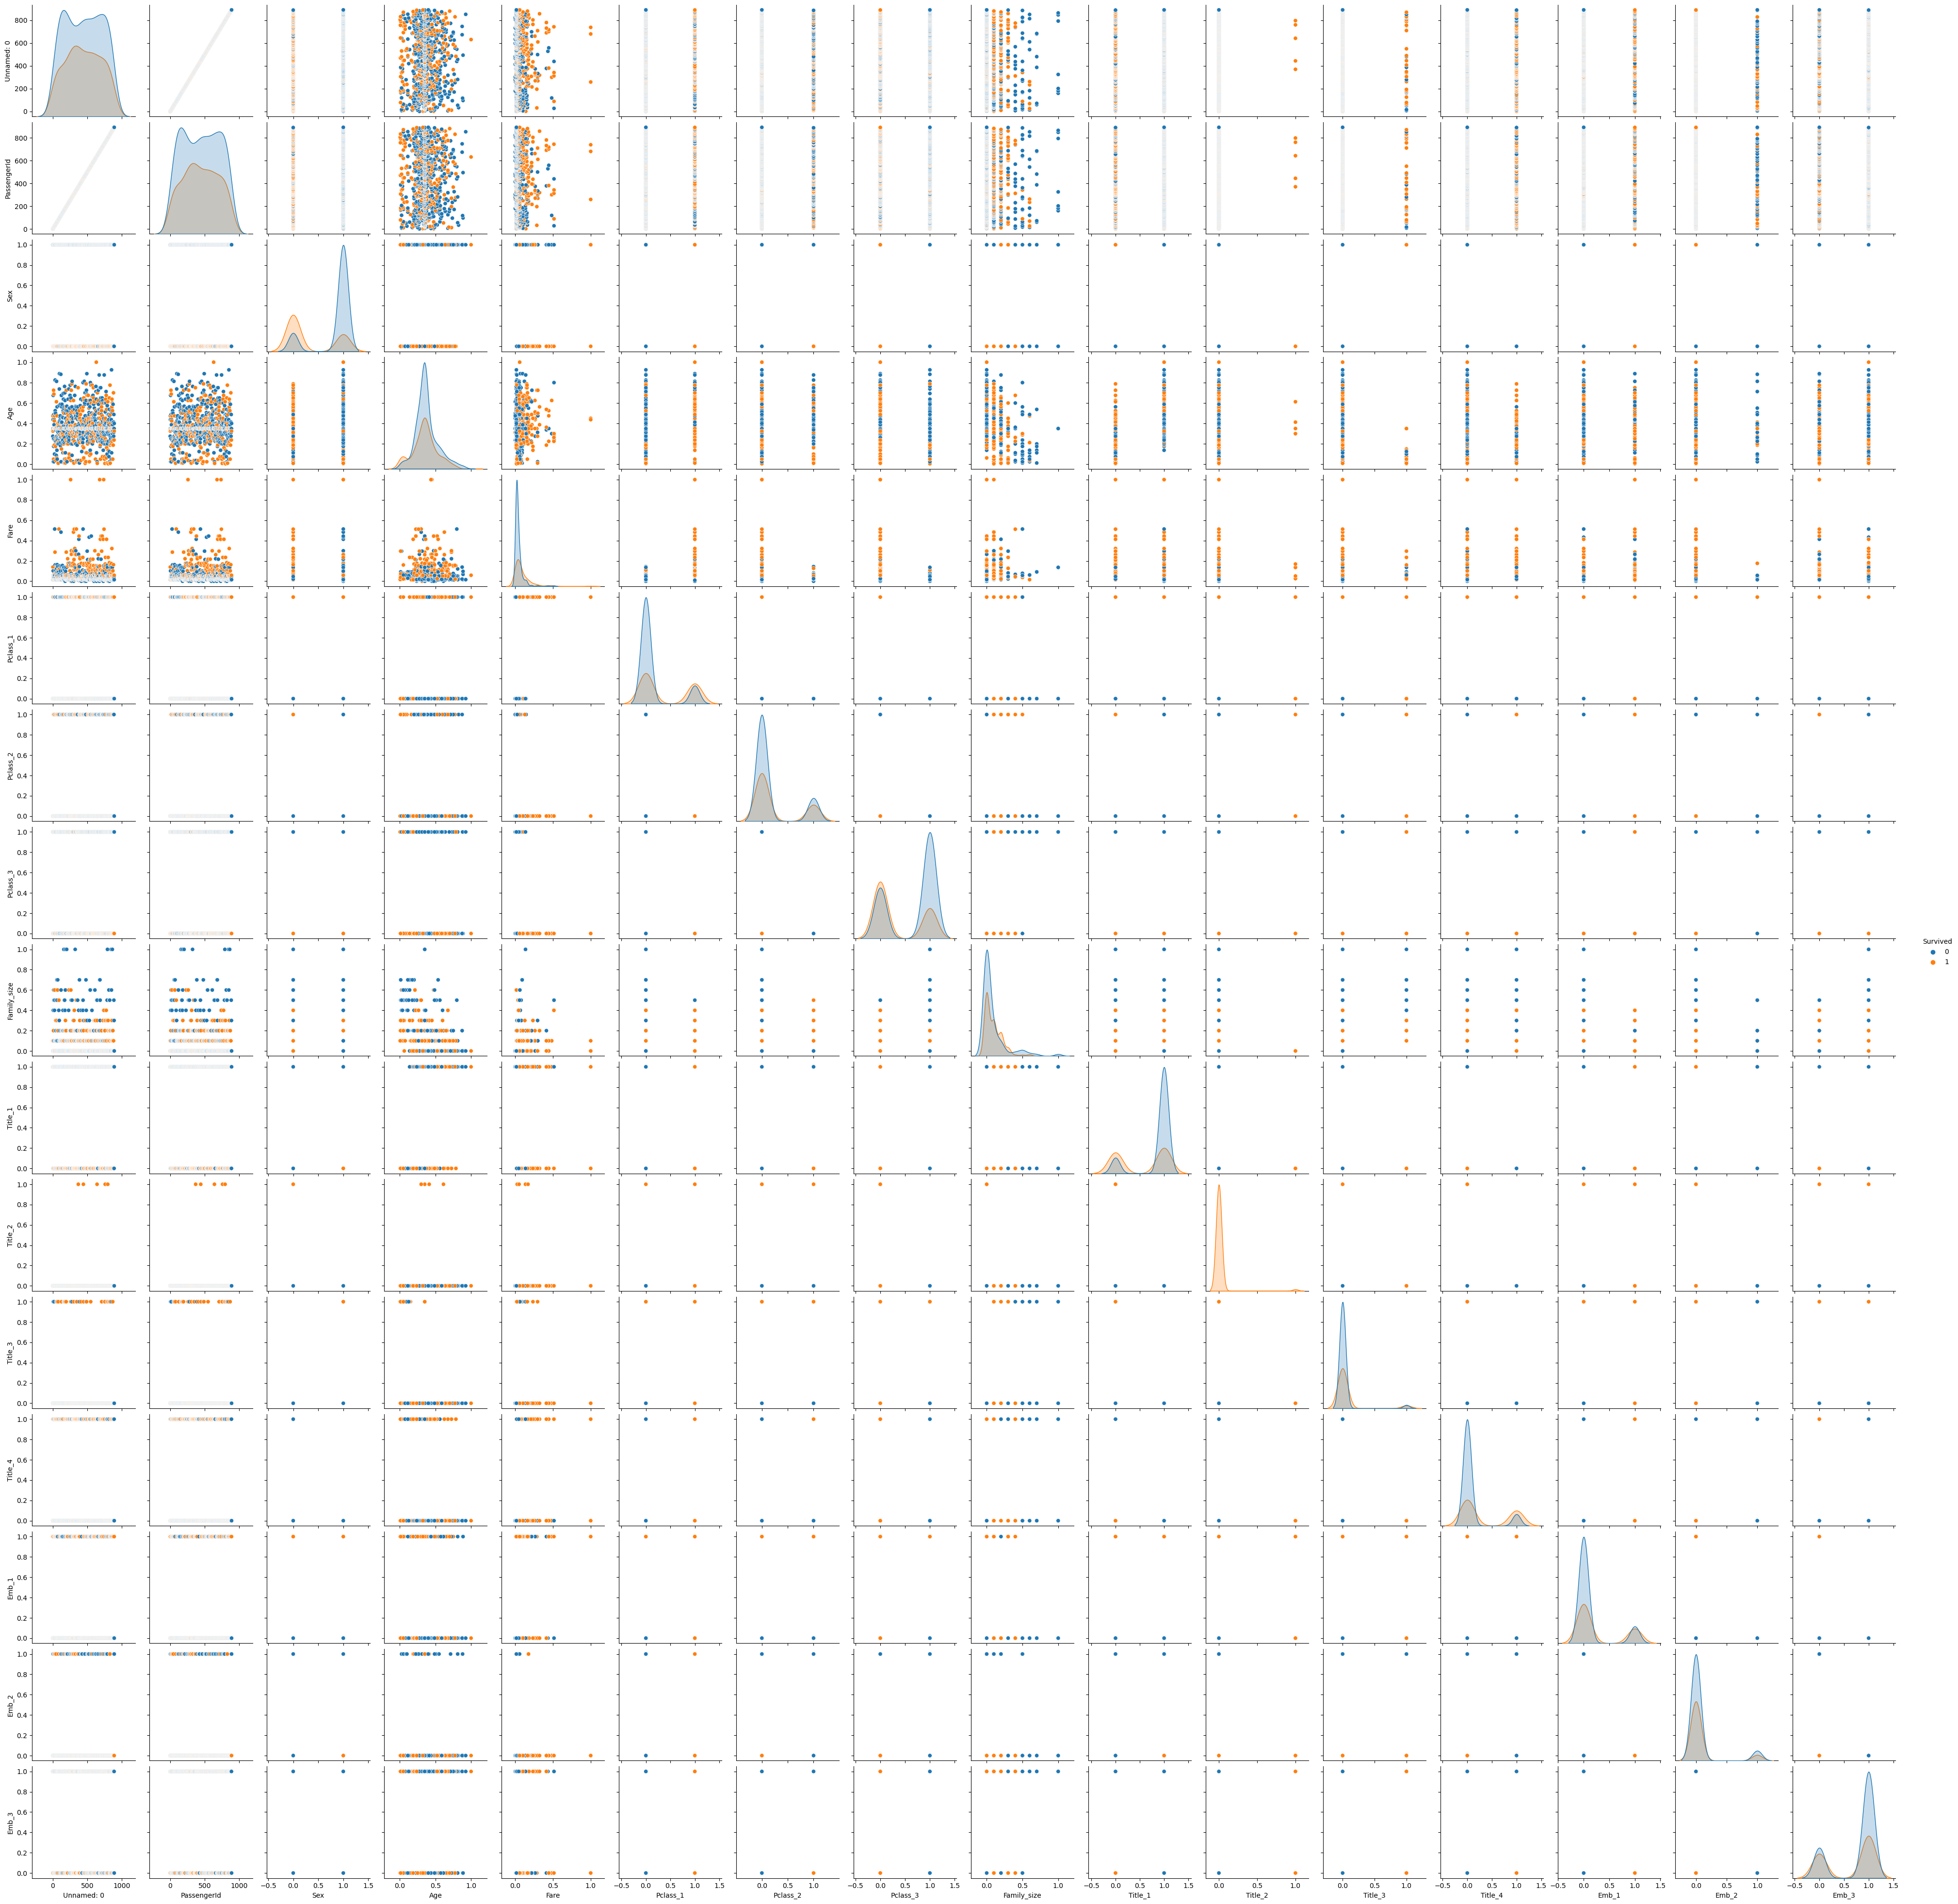

In [41]:
sns.pairplot(df, hue="Survived")
plt.show()

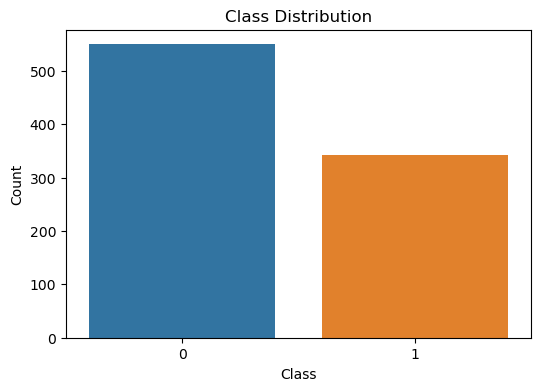

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

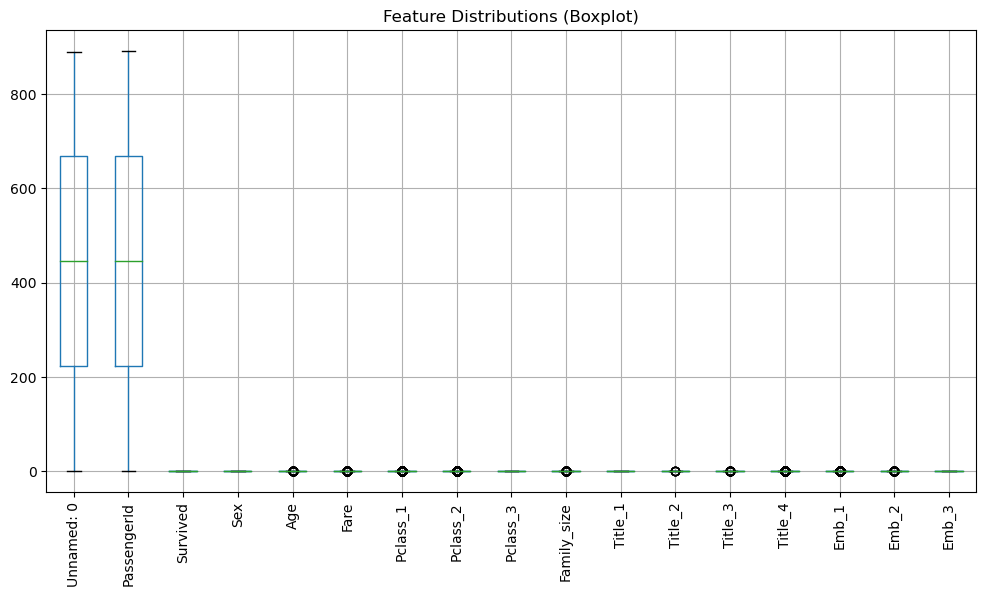

In [45]:
plt.figure(figsize=(12,6))
df[nc].boxplot(rot=90)
plt.title("Feature Distributions (Boxplot)")
plt.show()